# PREPROCESSIN WITH `POLARS`

In [1]:
import calendar

import polars as pl
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
import warnings

[warnings.filterwarnings("ignore", category=i) for i in (UserWarning, FutureWarning)]

[None, None]

In [3]:
pl.__version__

'0.20.3'

In [4]:
pl.Config.set_fmt_str_lengths(40)

polars.config.Config

In [5]:
df = pl.read_json(
    # "data/zip/Takeout/YouTube and YouTube Music/history/watch-history.json",
    "data/zip/Takeout_arv-anshul/YouTube and YouTube Music/history/watch-history.json"
)
print(df.shape)
df.head()

(7288, 7)


header,title,titleUrl,subtitles,time,products,activityControls
str,str,str,list[struct[2]],str,list[str],list[str]
"""YouTube""","""Watched I Made a 3D Operating System""","""https://www.youtube.com/watch?v=rJuRTZO…","[{""Recursion"",""https://www.youtube.com/channel/UCuHB_2AOt8vjuvZZp6tSoxg""}]","""2023-11-14T03:37:19.642Z""","[""YouTube""]","[""YouTube watch history""]"
"""YouTube""","""Watched The EU Will Break Apple.""","""https://www.youtube.com/watch?v=Hod69Y1…","[{""TechLinked"",""https://www.youtube.com/channel/UCeeFfhMcJa1kjtfZAGskOCA""}]","""2023-11-14T03:33:58.802Z""","[""YouTube""]","[""YouTube watch history""]"
"""YouTube""","""Watched Why are Rajasthanis unemployed?…","""https://www.youtube.com/watch?v=_GkAzfD…","[{""Soch by Mohak Mangal"",""https://www.youtube.com/channel/UCz4a7agVFr1TxU-mpAP8hkw""}]","""2023-11-14T03:19:08.026Z""","[""YouTube""]","[""YouTube watch history""]"
"""YouTube""","""Watched Google is paying Samsung - Good…","""https://www.youtube.com/watch?v=3K9miZL…","[{""Tech Junkies"",""https://www.youtube.com/channel/UCn4fhtzOgtoEKIrAAV4yCMA""}]","""2023-11-14T03:11:42.709Z""","[""YouTube""]","[""YouTube watch history""]"
"""YouTube""","""Watched GitHub Universe 2023 day 2 keyn…","""https://www.youtube.com/watch?v=h_o9kFP…","[{""GitHub"",""https://www.youtube.com/channel/UC7c3Kb6jYCRj4JOHHZTxKsQ""}]","""2023-11-13T18:27:21.868Z""","[""YouTube""]","[""YouTube watch history""]"


# Data Cleaning

## header

In [6]:
df.select(pl.col("header").unique())

header
str
"""YouTube Music"""
"""YouTube"""


In [7]:
df = df.drop("header")

## activityControls

In [8]:
df.select(pl.col("activityControls").explode().unique())

activityControls
str
"""YouTube watch history"""


In [9]:
# Arrange activityControls
df = df.with_columns(
    pl.col("activityControls")
    .list.contains("YouTube search history")
    .alias("fromYtSearchHistActivity"),
    pl.col("activityControls")
    .list.contains("YouTube watch history")
    .alias("fromYtWatchHistActivity"),
    pl.col("activityControls")
    .list.contains("Web & App Activity")
    .alias("fromWebAppActivity"),
).drop("activityControls")

## title and titleUrl

In [10]:
df = df.with_columns(
    pl.col("title").str.replace("Watched |Visited ", ""),
    pl.col("titleUrl").str.replace(
        "https://www.youtube.com/watch?v=", "https://youtu.be/", literal=True
    ),
)

In [11]:
df = df.with_columns(
    pl.col("time").cast(pl.Datetime("ms")),
).with_columns(
    year=pl.col("time").dt.year(),
    month=pl.col("time")
    .dt.month()
    .map_elements(lambda x: list(calendar.month_name)[int(x)]),
    day=pl.col("time")
    .dt.weekday()
    .map_elements(lambda x: list(calendar.day_name)[int(x) - 1]),
    hour=pl.col("time").dt.hour(),
)

In [12]:
df.select(pl.col("products").explode().unique())

products
str
"""YouTube"""


In [13]:
df = df.drop("products")

## details

In [14]:
if "details" in df.columns:
    df.select(pl.col("details").explode().unique())

In [15]:
if "details" in df.columns:
    df = df.with_columns(
        pl.col("details")
        .list.get(0)
        .struct.field("name")
        .map_elements(bool)
        .fill_null(False)
        .alias("fromGoogleAds")
    ).drop("details")

## subtitles

### Extract channelName & channelUrl

In [16]:
df = (
    df.with_columns(pl.col("subtitles").list.get(0))
    .with_columns(
        pl.col("subtitles").struct.field("name").alias("channelName"),
        pl.col("subtitles").struct.field("url").alias("channelUrl"),
    )
    .with_columns(
        pl.col("channelUrl").str.strip_prefix("https://www.youtube.com/channel/")
    )
    .drop("subtitles")
)

## description

This column has some irregularity in the data and also I did not understand the data of it. Thats why I am dropping it for no reason.

> **Whats the Irregularity here?**
>
> Some of the rows contains multiple **wathed time**.

In [17]:
if "description" in df.columns:
    df.select(
        pl.all(),
        pl.col("description")
        .str.replace("Watched at ", "", literal=True, n=3)
        .alias("itme"),
        # .str.to_date("%I:%M %p", strict=False)
        # .unique()
    ).drop_nulls("itme").head()

In [18]:
if "description" in df.columns:
    df = df.drop("description")

In [19]:
df = df.with_columns(
    pl.col("title").str.contains("(?i)#short").alias("isShorts"),
)

In [20]:
df.filter(pl.col("isShorts").eq(True)).height

320

# Univariate analysis

In [21]:
df["year"].value_counts(sort=True)

year,count
i32,u32
2022,3737
2023,3551


In [22]:
df["month"].value_counts(sort=True)

month,count
str,u32
"""August""",1270
"""October""",913
"""September""",888
"""July""",838
"""November""",727
"""January""",472
"""February""",447
"""December""",430
"""March""",416


In [23]:
df["day"].value_counts(sort=True)

day,count
str,u32
"""Thursday""",1197
"""Wednesday""",1148
"""Monday""",1064
"""Tuesday""",1010
"""Saturday""",996
"""Friday""",986
"""Sunday""",887


In [24]:
df.head()

title,titleUrl,time,fromYtSearchHistActivity,fromYtWatchHistActivity,fromWebAppActivity,year,month,day,hour,channelName,channelUrl,isShorts
str,str,datetime[ms],bool,bool,bool,i32,str,str,i8,str,str,bool
"""I Made a 3D Operating System""","""https://youtu.be/rJuRTZOE99g""",2023-11-14 03:37:19.642,false,true,false,2023,"""November""","""Tuesday""",3,"""Recursion""","""UCuHB_2AOt8vjuvZZp6tSoxg""",false
"""The EU Will Break Apple.""","""https://youtu.be/Hod69Y1aVlY""",2023-11-14 03:33:58.802,false,true,false,2023,"""November""","""Tuesday""",3,"""TechLinked""","""UCeeFfhMcJa1kjtfZAGskOCA""",false
"""Why are Rajasthanis unemployed?""","""https://youtu.be/_GkAzfDD-uc""",2023-11-14 03:19:08.026,false,true,false,2023,"""November""","""Tuesday""",3,"""Soch by Mohak Mangal""","""UCz4a7agVFr1TxU-mpAP8hkw""",false
"""Google is paying Samsung - Good news fo…","""https://youtu.be/3K9miZLIBfg""",2023-11-14 03:11:42.709,false,true,false,2023,"""November""","""Tuesday""",3,"""Tech Junkies""","""UCn4fhtzOgtoEKIrAAV4yCMA""",false
"""GitHub Universe 2023 day 2 keynote: The…","""https://youtu.be/h_o9kFPVeiw""",2023-11-13 18:27:21.868,false,true,false,2023,"""November""","""Monday""",18,"""GitHub""","""UC7c3Kb6jYCRj4JOHHZTxKsQ""",false


In [25]:
df["title"].is_null().sum()

0

In [26]:
df["title"].str.extract(r"://(.*?)/").unique()

title
str
"""www.youtube.com"""
null


In [27]:
df["titleUrl"].str.extract(r"://(.*?)/").unique()

titleUrl
str
"""music.youtube.com"""
null
"""youtu.be"""


In [28]:
top_channels = df["channelName"].value_counts(sort=True).to_pandas()
top_channels.head(10)

,channelName,count
0,CampusX,440
1,Dekho Isko,417
2,None,308
3,Krish Naik,242
4,Tried&Refused Productions.,239
5,Varun Mayya,172
6,Sarthak Goswami,166
7,Abhi and Niyu,137
8,NeuralNine,131
9,ArjanCodes,127


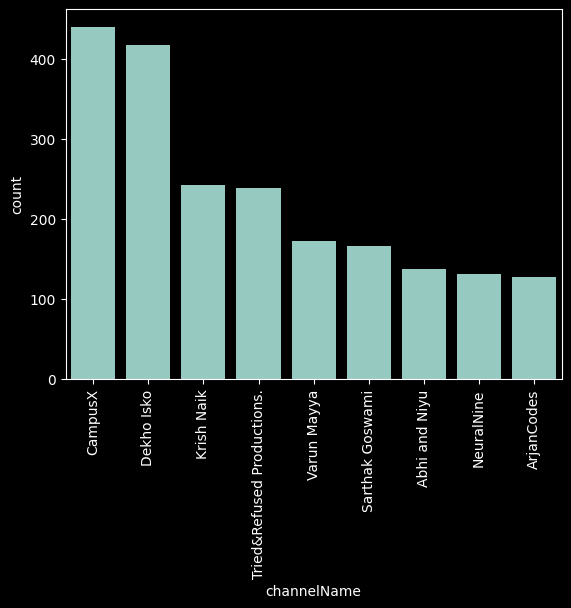

In [30]:
sns.barplot(top_channels.head(10), x="channelName", y="count")
plt.xticks(rotation=90)
plt.show()

In [31]:
hour_day_pivot = (
    df.pivot("titleUrl", "hour", "day", pl.count(), sort_columns=True)
    .fill_null(0)
    .sort("hour")
    .drop("hour")
)
day_year_pivot = df.pivot(
    "titleUrl", "day", "year", pl.count(), sort_columns=True
).fill_null(0)
hour_year_pivot = (
    df.pivot("titleUrl", "hour", "year", pl.count(), sort_columns=True)
    .fill_null(0)
    .sort("hour")
    .drop("hour")
)

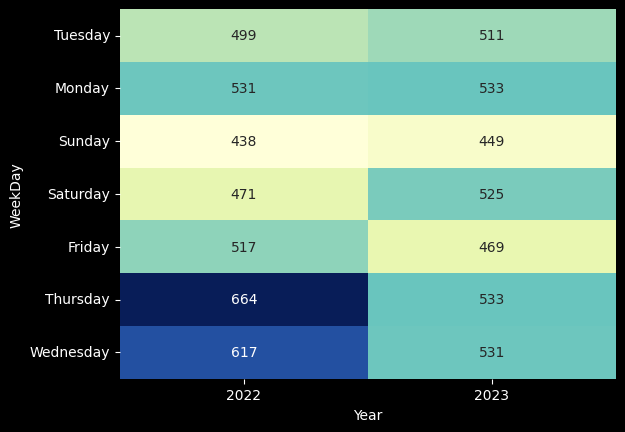

In [32]:
sns.heatmap(
    day_year_pivot.to_pandas().set_index("day"),
    annot=True,
    fmt="d",
    cmap="YlGnBu",
    cbar=False,
)
plt.xlabel("Year")
plt.ylabel("WeekDay")
plt.show()

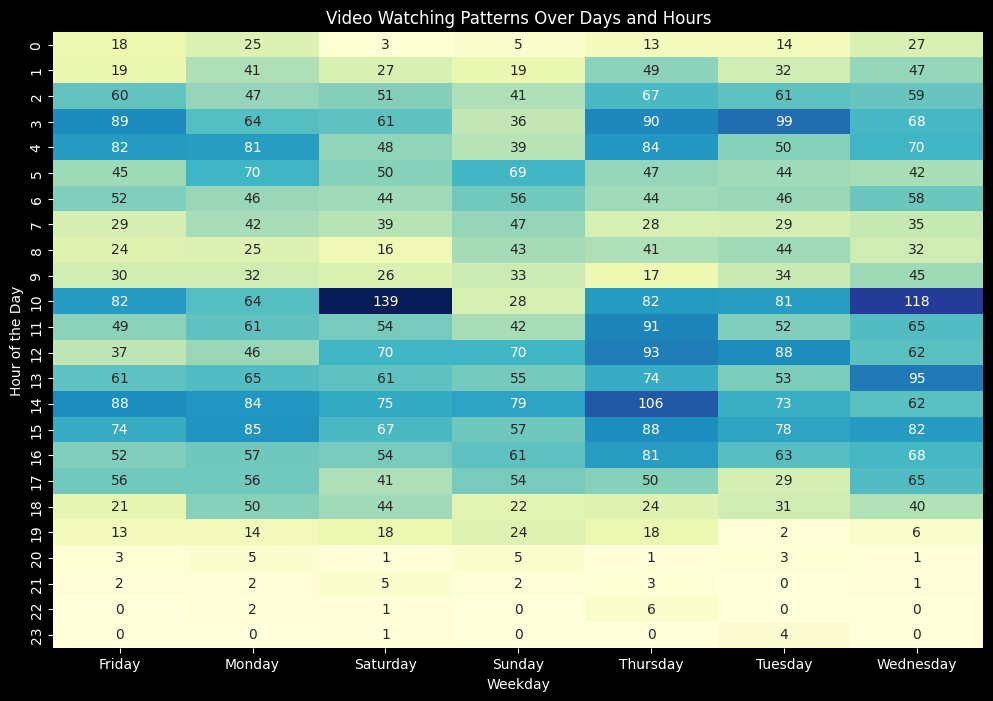

In [33]:
plt.figure(figsize=(12, 8))
sns.heatmap(hour_day_pivot, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Video Watching Patterns Over Days and Hours")

plt.xticks([i + 0.5 for i in range(7)], hour_day_pivot.columns)
plt.xlabel("Weekday")
plt.ylabel("Hour of the Day")
plt.show()

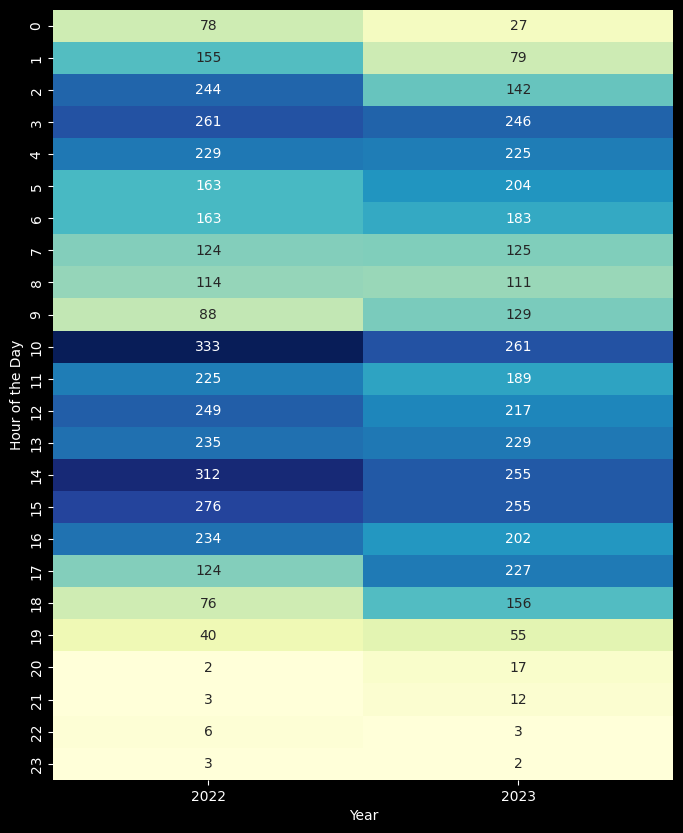

In [34]:
plt.figure(figsize=(8, 10))
sns.heatmap(hour_year_pivot, annot=True, fmt="d", cmap="YlGnBu", cbar=False)

plt.xticks(
    [i + 0.5 for i in range(len(hour_year_pivot.columns))],
    hour_year_pivot.columns,
    ha="center",
)
plt.xlabel("Year")
plt.ylabel("Hour of the Day")
plt.show()